In [1]:
import sys
import numpy as np
sys.path.append("/Users/mlokken/research/lyman_alpha/software/cupix")
from cupix.likelihood.lya_theory import set_theory
from cupix.likelihood.forestflow_emu import FF_emulator
from cupix.likelihood.input_pipeline import Args
%load_ext autoreload
%autoreload 2
from lace.cosmo import camb_cosmo
import matplotlib.pyplot as plt


Load the emulator

In [67]:
# Load emulator
z = np.array([2.2,2.4])
omnuh2 = 0.0006
mnu = omnuh2 * 93.14
H0 = 67.36
omch2 = 0.12
ombh2 = 0.02237
As = 2.1e-9
ns = 0.9649
nrun = 0.0
w = -1.0
omk = 0
cosmo = {
    'H0': H0,
    'omch2': omch2,
    'ombh2': ombh2,
    'mnu': mnu,
    'omk': omk,
    'As': As,
    'ns': ns,
    'nrun': nrun,
    'w': w
}
sim_cosmo = camb_cosmo.get_cosmology_from_dictionary(cosmo)
cc = camb_cosmo.get_camb_results(sim_cosmo, zs=z, camb_kmax_Mpc=1000)
ffemu = FF_emulator(z, cosmo, cc)

 /Users/mlokken/research/lyman_alpha/software/ForestFlow/forestflow/P3D_cINN.py:781: UserWarning:Loading a pre-trained emulator


In [68]:
ffemu.emu_params

['Delta2_p', 'n_p', 'mF', 'sigT_Mpc', 'gamma', 'kF_Mpc']

In [69]:
ffemu.kp_Mpc = 1 # pivot point

Set the theory

In [70]:
emu_params = Args()
emu_params.set_baseline()
# initial_gamma = 1.74
# initial_lambda_pressure = 79.4

theory_kms = set_theory(emu_params, ffemu, k_unit='ikms')

theory_kms.set_fid_cosmo(z)

In [71]:
ffemu.emu_params

['Delta2_p', 'n_p', 'mF', 'sigT_Mpc', 'gamma', 'kF_Mpc']

In [72]:
# theta should be of shape: # (N_z, N_theta, 2)
k_kms = np.array([np.linspace(0.0001,.1,100), np.linspace(0.0001,.1,100)])
theta_bin_deg = np.asarray([[[0,0.01],[0.01,0.1],[.1,.5],[.5,1]], [[0,0.05],[0.05,0.07],[0.07,0.1],[0.1,0.4]]])
theta_bin_deg.shape

(2, 4, 2)

In [78]:
out_kms = theory_kms.get_px_kms(
        zs = z,
        k_kms=k_kms,
        theta_bin_deg=theta_bin_deg,
        return_blob=False
    )

emu call ffemu {'Delta2_p': array([0.69934305, 0.6219795 ]), 'n_p': array([-2.37612299, -2.37612285]), 'mF': array([0.82247582, 0.78956355]), 'sigT_Mpc': array([0.13105014, 0.13014596]), 'gamma': array([1.54611955, 1.53976528]), 'kF_Mpc': array([9.4974917 , 9.76612371])}
Nz is 2
Px pred shape before return (2, 1000, 100)


In [79]:
out_kms.shape

(2, 4, 100)

z= 2.2
z= 2.4


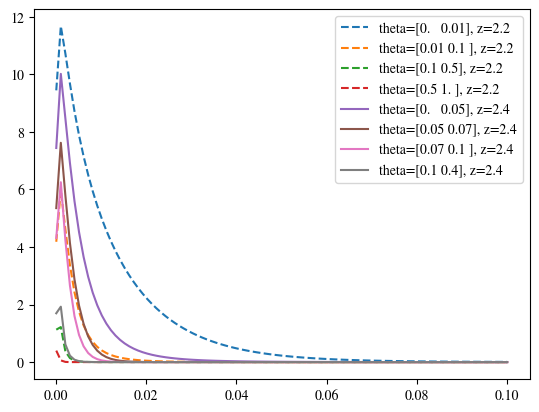

In [74]:
for iz, zbin in enumerate(out_kms):
    print("z=", z[iz])
    if iz==0:
        linestyle='dashed'
    else:
        linestyle='solid'
    
    for itheta, theta in enumerate(zbin):
        # print(out[iz][itheta])
        plt.plot(k_kms[iz], out_kms[iz][itheta], label='theta={}, z={}'.format(theta_bin_deg[iz][itheta], z[iz]), linestyle=linestyle)
    
plt.legend()

Current working version includes option to have different k for different redshift bins, but not for different theta (might want to make this fully generic)


Try in Angstroms

In [15]:
# Load emulator
z = np.array([2.2, 2.4])
omnuh2 = 0.0006
mnu = omnuh2 * 93.14
H0 = 67.36
omch2 = 0.12
ombh2 = 0.02237
As = 2.1e-9
ns = 0.9649
nrun = 0.0
w = -1.0
omk = 0
cosmo = {
    'H0': H0,
    'omch2': omch2,
    'ombh2': ombh2,
    'mnu': mnu,
    'omk': omk,
    'As': As,
    'ns': ns,
    'nrun': nrun,
    'w': w
}
sim_cosmo = camb_cosmo.get_cosmology_from_dictionary(cosmo)
cc = camb_cosmo.get_camb_results(sim_cosmo, zs=z, camb_kmax_Mpc=1000)
ffemu = FF_emulator(z, cosmo, cc)
ffemu.kp_Mpc = 1 # pivot point

 /Users/mlokken/research/lyman_alpha/software/ForestFlow/forestflow/P3D_cINN.py:781: UserWarning:Loading a pre-trained emulator


In [16]:
emu_params = Args()
emu_params.set_baseline()
theory_AA = set_theory(emu_params, ffemu, k_unit='iAA')
theory_AA.set_fid_cosmo(z)

In [17]:
theta_bin_deg = np.asarray([[[0,0.02],[0.02,0.1],[.1,.5],[.5,1]], [[0,0.02],[0.02,0.1],[.1,.5],[.5,1]]])
k_AA = np.array([np.linspace(0.01,.8,100), np.linspace(0.01,.8,100)])
k_AA.shape, z.shape, theta_bin_deg.shape

((2, 100), (2,), (2, 4, 2))

In [19]:
out_AA = theory_AA.get_px_AA(
        zs = z,
        k_AA=k_AA,
        theta_bin_deg=theta_bin_deg,
        return_blob=False
    )

emu call ffemu {'Delta2_p': array([0.69934305, 0.6219795 ]), 'n_p': array([-2.37612299, -2.37612285]), 'mF': array([0.82247582, 0.78956355]), 'sigT_Mpc': array([0.13105014, 0.13014596]), 'gamma': array([1.54611955, 1.53976528]), 'kF_Mpc': array([9.4974917 , 9.76612371])}
Nz is 2
Px pred shape before return (2, 1000, 100)
px_Mpc_fine shape (2, 1000, 100)
px_pred_Mpc_avg shape (2, 4, 100)


z= 2.2
z= 2.4


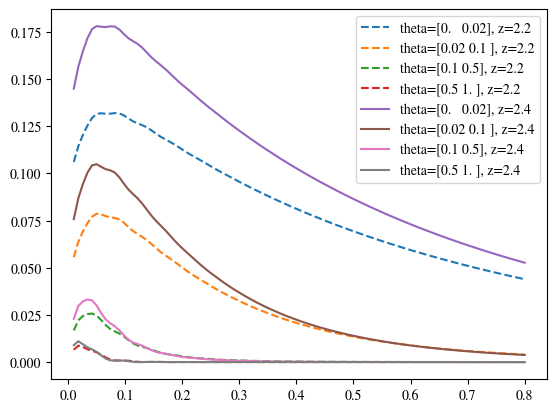

In [20]:
for iz, zbin in enumerate(out_AA):
    print("z=", z[iz])
    if iz==0:
        linestyle='dashed'
    else:
        linestyle='solid'
    
    for itheta, theta in enumerate(zbin):
        # print(out[iz][itheta])
        plt.plot(k_AA[iz], out_AA[iz][itheta], label='theta={}, z={}'.format(theta_bin_deg[iz][itheta], z[iz]), linestyle=linestyle)
    
plt.legend()


Show for a case of only 1 z

In [21]:
# Load emulator
z = np.array([2.2])
omnuh2 = 0.0006
mnu = omnuh2 * 93.14
H0 = 67.36
omch2 = 0.12
ombh2 = 0.02237
As = 2.1e-9
ns = 0.9649
nrun = 0.0
w = -1.0
omk = 0
cosmo = {
    'H0': H0,
    'omch2': omch2,
    'ombh2': ombh2,
    'mnu': mnu,
    'omk': omk,
    'As': As,
    'ns': ns,
    'nrun': nrun,
    'w': w
}
sim_cosmo = camb_cosmo.get_cosmology_from_dictionary(cosmo)
cc = camb_cosmo.get_camb_results(sim_cosmo, zs=z, camb_kmax_Mpc=1000)
ffemu = FF_emulator(z, cosmo, cc)
ffemu.kp_Mpc = 1 # pivot point

 /Users/mlokken/research/lyman_alpha/software/ForestFlow/forestflow/P3D_cINN.py:781: UserWarning:Loading a pre-trained emulator


In [22]:
emu_params = Args()
emu_params.set_baseline()
theory_AA = set_theory(emu_params, ffemu, k_unit='iAA')
theory_AA.set_fid_cosmo(z)

In [24]:
theta_bin_deg = np.asarray([[[0,0.02],[0.02,0.1],[.1,.5],[.5,1]]])
k_AA = np.array([np.linspace(0.01,.8,100)])
k_AA.shape, z.shape, theta_bin_deg.shape

((1, 100), (1,), (1, 4, 2))

In [29]:
out_AA = theory_AA.get_px_AA(
        zs = z,
        k_AA=k_AA,
        theta_bin_deg=theta_bin_deg,
        return_blob=False
    )

emu call ffemu {'Delta2_p': array([0.69934305]), 'n_p': array([-2.37612299]), 'mF': array([0.82247582]), 'sigT_Mpc': array([0.13105014]), 'gamma': array([1.54611955]), 'kF_Mpc': array([9.4974917])}
Nz is 1
Input parameters were: {'Delta2_p': 0.6993430466113306, 'n_p': -2.3761229886105366, 'mF': 0.8224758188321042, 'sigT_Mpc': 0.1310501400763064, 'gamma': 1.546119545804784, 'kF_Mpc': 9.497491696572993}
Input parameters given to the arinyo model are: {'bias': 0.10620345, 'beta': 1.5715878, 'q1': 0.1247827, 'kvav': 0.47364765, 'av': 0.2584024, 'bv': 1.7133832, 'kp': 13.252685, 'q2': 0.3130453}
Calling...
Px pred shape before return (100, 1, 1000)
px pred shape becomes (1, 1000, 100)
px_Mpc_fine shape (1, 1000, 100)
px_pred_Mpc_avg shape (1, 4, 100)


z= 2.2


(0.0, 0.18)

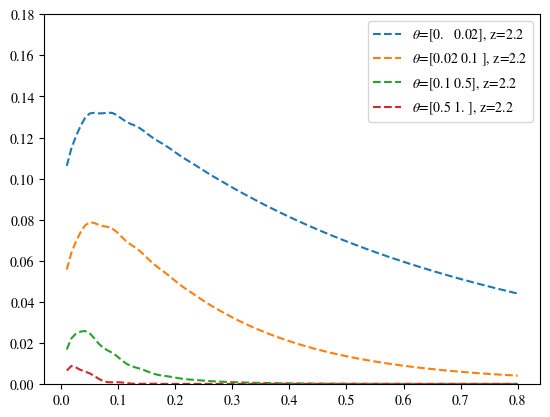

In [36]:
for iz, zbin in enumerate(out_AA):
    print("z=", z[iz])
    if iz==0:
        linestyle='dashed'
    else:
        linestyle='solid'
    
    for itheta, theta in enumerate(zbin):
        # print(out[iz][itheta])
        plt.plot(k_AA[iz], out_AA[iz][itheta], label=r'$\theta$={}, z={}'.format(theta_bin_deg[iz][itheta], z[iz]), linestyle=linestyle)
    
plt.legend()
plt.ylim([0,0.18])